In [42]:
# Import necessary modules for TARDIS High Energy Workflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import constants as constants
from astropy import units as u
from scipy.interpolate import interp1d

from tardis.io.atom_data import AtomData, download_atom_data
from tardis.io.configuration.config_reader import Configuration
from tardis.workflows.high_energy.tardis_he_workflow import TARDISHEWorkflow

# Configure matplotlib for LaTeX rendering of scientific notation and Greek letters
plt.rcParams["text.usetex"] = (
    False  # Use mathtext instead of full LaTeX for better compatibility
)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"  # Computer Modern fonts for consistency

In [43]:
# Download and load atomic data
# We recommend using the latest atomic data from the TARDIS data repository
atomic_data_fname = "kurucz_cd23_chianti_H_He_latest"
download_atom_data(atomic_data_fname)
atom_data = AtomData.from_hdf("kurucz_cd23_chianti_H_He_latest.h5")

INFO:tardis.io.atom_data.util:
	Atom Data kurucz_cd23_chianti_H_He_latest.h5 not found in local path.
	Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He_latest.h5
INFO:tardis.io.atom_data.util:
	Atom Data kurucz_cd23_chianti_H_He_latest.h5 not found in local path.
	Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He_latest.h5
INFO:tardis.io.atom_data.base:Reading Atom Data with: UUID = b58b2ef63bf811f08edf96479f911fbd MD5  = 5d80fa4ae0638469bf1ff281b6ca2a94 
INFO:tardis.io.atom_data.base:Non provided Atomic Data: levels, lines, collision_data, collision_data_temperatures, synpp_refs, photoionization_data, yg_data, two_photon_data, linelist_atoms, linelist_molecules
INFO:tardis.io.atom_data.base:Reading Atom Data with: UUID = b58b2ef63bf811f08edf96479f911fbd MD5  = 5d80fa4ae0638469bf1ff281b6ca2a94 
INFO:tardis.io.atom_data.base:Non provided Atomic Data: levels, lines, collision_data, collision_data

# TARDIS High Energy Workflow Tutorial

This notebook demonstrates how to use the TARDIS High Energy (HE) Workflow to simulate $\gamma$-ray transport in supernova ejecta. The HE workflow is specifically designed to model high-energy phenomena in supernovae, including:

- $\gamma$-ray transport through the ejecta
- Energy deposition processes
- Positron-electron pair creation
- Compton scattering
- Photoabsorption processes

In this example, we'll simulate a **white dwarf merger scenario for Type Ia supernovae** using:
- **Merger model**: Based on the hydrodynamic simulation from **Pakmor et al. (2012)**
- **$\gamma$-ray transport**: Compared against reference results from **Summa et al. (2013)**

This represents a double-detonation scenario where $\gamma$-rays from radioactive decay (primarily $^{56}$Ni → $^{56}$Co → $^{56}$Fe) play a crucial role in powering the optical light curve.

This tutorial is based on the methodology and results presented in **Dutta et al. (2025)**, which demonstrates the application of the TARDIS HE workflow to Type Ia supernova models and provides detailed analysis of $\gamma$-ray transport in these systems.

In [44]:
# Load the white dwarf merger configuration (Pakmor et al. 2012)
# This configuration represents a Type Ia supernova from a double-detonation scenario
# Gamma-ray transport results will be compared against Summa et al. 2013

config_file = "tardis_config_merger_2012.yml"
config = Configuration.from_yaml(config_file)

In [45]:
# Initialize the TARDIS High Energy Workflow
he_workflow = TARDISHEWorkflow(
    atom_data=atom_data, configuration=config, config_type="csvy"
)

INFO:tardis.model.matter.decay:Decaying abundances for 2600540.0352 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 2600540.0352 seconds


In [54]:
# Run the High Energy simulation for Type Ia supernova
# These parameters are optimized for white dwarf merger gamma-ray transport

simulation_params = {
    "time_start": 2.0,  # Start time in days (early in SN evolution)
    "time_end": 100.0,  # End time in days (covers main decay period)
    "number_of_packets": int(
        1e6
    ),  # Number of gamma-ray packets (for quick demo)
    "time_steps": 500,  # Number of time steps
    "time_space": "log",  # Logarithmic time spacing (appropriate for decay)
    "seed": 1993,  # Random seed for reproducibility
    "fp": 0.0,  # Covering factor
    "spectrum_bins": 300,  # Number of spectrum bins
    "grey_opacity": -1,  # Use detailed opacity calculation
    "legacy": True,
    "legacy_atom_data": atom_data,  # Use legacy mode for compatibility
}

# Run the simulation (commented out for demo - use pre-computed results)
he_result = he_workflow.run(**simulation_params)

INFO:tardis.model.matter.decay:Decaying abundances for 1357.2980077192738 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1367.9592223127727 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1367.9592223127727 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1378.7041779093443 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1378.7041779093443 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1389.5335322722658 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1389.5335322722658 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1400.4479483313573 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1400.4479483313573 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1411.4480942236141 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1411.4480942236141 seconds
INFO:tardis.model.matter.decay:Decaying abundances for 1422.5346433340703 seconds
INFO:tardis.mode

Entering gamma ray loop for 1000000 packets
Number of escaped packets: 260519
Number of scattered packets: 83913


## TARDIS vs Summa et al. 2013 Comparison

This section compares TARDIS HE results with reference $\gamma$-ray transport calculations from **Summa et al. (2013)**. 

### Model Setup
- **Merger simulation**: White dwarf double-detonation model from **Pakmor et al. (2012)**
- **$\gamma$-ray reference**: Monte Carlo transport results from **Summa et al. (2013)**
- **TARDIS implementation**: High-energy workflow validation against established benchmarks

### Data Extraction Options

The TARDIS HE workflow provides two ways to access the $\gamma$-ray spectra:

1. **Direct extraction** from the simulation result object (`he_result.escaped_energy_spectrum`)
2. **Loading from disk** using pre-computed high-statistics results

For this tutorial, we use pre-computed results with 5×10$^7$ packets to ensure:
- **High signal-to-noise ratio** for clear spectral features
- **Faster execution** without waiting for long simulations
- **Reproducible results** for documentation purposes

In [47]:
# Data loading - choose your option below
DISTANCE = 10 * u.pc
flux_conversion = 1 / (4 * np.pi * DISTANCE**2)

# Option 1: From workflow result
# tardis_luminosity_density_df = he_result.escape_energy

# Option 2: From pre-computed file
tardis_luminosity_density_df = pd.read_csv(
    "merger_2012_100d_500ts_5e7_escape_energy.csv", index_col=0
)

# Extract time and energy grids with units
tardis_times_explosion = (
    tardis_luminosity_density_df.columns.values.astype(float) * u.s
)
tardis_times_explosion = tardis_times_explosion.to(u.day)
tardis_energies = tardis_luminosity_density_df.index.values * u.keV

# Create luminosity density and flux arrays with standard units
tardis_luminosity_density = (
    tardis_luminosity_density_df.values * u.erg / u.s / u.Hz
).to(u.erg / u.s / u.Hz)
tardis_flux = (tardis_luminosity_density * flux_conversion).to(
    u.erg / u.cm**2 / u.s / u.Hz
)

# Load Summa et al. 2013 reference data
summa2013_flux_df = pd.read_csv(
    "merger_2012_11_09_spectra_gamma.dat", sep=r"\s+"
)
summa2013_flux_df.set_index(summa2013_flux_df.columns[0], inplace=True)

# Extract time and energy grids with units
summa2013_times_explosion = (
    summa2013_flux_df.columns.values.astype(float) * u.day
)
summa2013_energies = summa2013_flux_df.index.values * u.MeV

# Create flux and luminosity density arrays with standard units
summa2013_flux = (summa2013_flux_df.values * u.erg / u.cm**2 / u.s / u.Hz).to(
    u.erg / u.cm**2 / u.s / u.Hz
)
summa2013_luminosity_density = (summa2013_flux * (4 * np.pi * DISTANCE**2)).to(
    u.erg / u.s / u.Hz
)

In [48]:
# Target times for comparison
target_times = [25, 50, 100] * u.day


# Find closest time indices, handling out-of-bounds cases
def get_closest_index(times, target):
    idx = times.searchsorted(target)
    return min(idx, len(times) - 1)


# Find indices and extract data at target times
tardis_indices = [
    get_closest_index(tardis_times_explosion, t) for t in target_times
]
summa2013_indices = [
    get_closest_index(summa2013_times_explosion, t) for t in target_times
]

tardis_target_times = [tardis_times_explosion[i] for i in tardis_indices]
summa2013_target_times = [
    summa2013_times_explosion[i] for i in summa2013_indices
]

tardis_target_flux = [tardis_flux[:, i] for i in tardis_indices]
summa2013_target_flux = [summa2013_flux[:, i] for i in summa2013_indices]

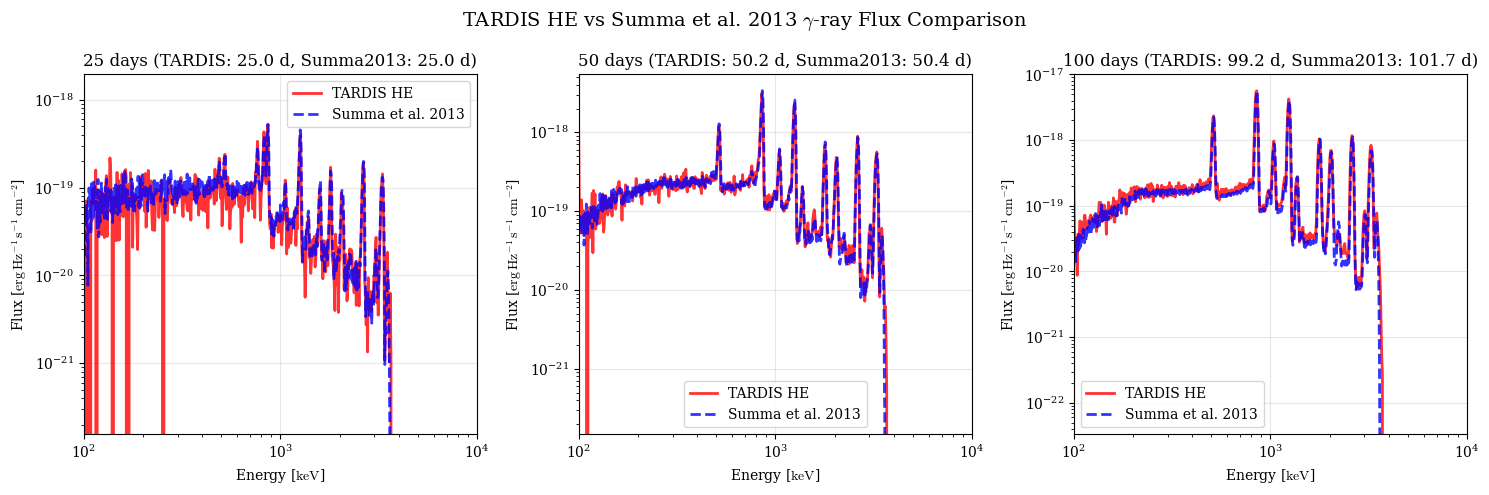

In [52]:
# Spectral comparison plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(
    r"TARDIS HE vs Summa et al. 2013 $\gamma$-ray Flux Comparison", fontsize=14
)

target_labels = [f"{t.value:.0f} days" for t in target_times]

for i, (ax, label) in enumerate(zip(axes, target_labels)):
    ax.loglog(
        tardis_energies,
        tardis_target_flux[i],
        "r-",
        label="TARDIS HE",
        linewidth=2,
        alpha=0.8,
    )
    ax.loglog(
        summa2013_energies.to(u.keV),
        summa2013_target_flux[i],
        "b--",
        label="Summa et al. 2013",
        linewidth=2,
        alpha=0.8,
    )

    ax.set_title(
        f"{label} (TARDIS: {tardis_target_times[i]:.1f}, Summa2013: {summa2013_target_times[i]:.1f})"
    )
    ax.set_xlabel(f"Energy [{tardis_energies.unit:latex_inline}]")
    ax.set_ylabel(f"Flux [{tardis_target_flux[i].unit:latex_inline}]")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(100, 10000)

plt.tight_layout()
plt.show()

/var/folders/fg/nwmb1mss6kq3hwhj10dt0qh00000gn/T/ipykernel_99945/3145511594.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


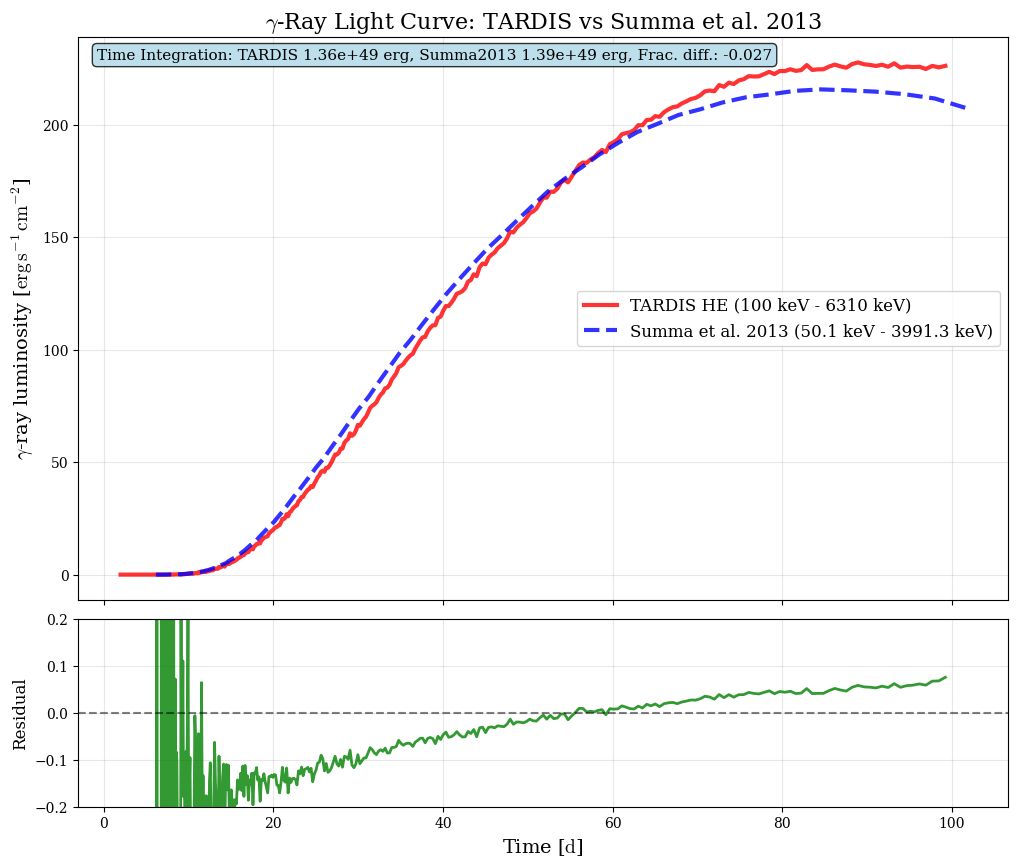

In [53]:
# Gamma-ray light curve comparison with time integration and residuals

# TARDIS light curve integration - use full energy range
tardis_frequencies = (tardis_energies / const.h).to(u.Hz)
tardis_gamma_luminosity_density = np.trapezoid(
    tardis_flux, tardis_frequencies, axis=0
)

# Summa et al. 2013 light curve integration - use full energy range
summa2013_frequencies = (summa2013_energies / const.h).to(u.Hz)
summa2013_gamma_luminosity_density = np.trapezoid(
    summa2013_flux, summa2013_frequencies, axis=0
)

# Time integration of gamma-ray luminosity
tardis_gamma_luminosity = (
    tardis_gamma_luminosity_density / flux_conversion
).to(u.erg / u.s)
summa2013_gamma_luminosity = (
    summa2013_gamma_luminosity_density / flux_conversion
).to(u.erg / u.s)

# Integrate over time using trapezoidal rule
tardis_total_energy = np.trapezoid(
    tardis_gamma_luminosity, tardis_times_explosion.to(u.s)
)
summa2013_total_energy = np.trapezoid(
    summa2013_gamma_luminosity, summa2013_times_explosion.to(u.s)
)

# Calculate fractional difference (not percentage)
fractional_difference = (
    tardis_total_energy - summa2013_total_energy
) / summa2013_total_energy

# Get energy ranges for legend
tardis_energy_min = tardis_energies.min()
tardis_energy_max = tardis_energies.max()
summa2013_energy_min = summa2013_energies.to(u.keV).min()
summa2013_energy_max = summa2013_energies.to(u.keV).max()

# Create figure with two subplots using shared x-axis
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(12, 10),
    sharex=True,
    gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05},
)

# Top panel: Main light curve plot
ax1.plot(
    tardis_times_explosion,
    tardis_gamma_luminosity_density,
    "r-",
    linewidth=3,
    label=f"TARDIS HE ({tardis_energy_min:.0f} - {tardis_energy_max:.0f})",
    alpha=0.8,
)
ax1.plot(
    summa2013_times_explosion,
    summa2013_gamma_luminosity_density,
    "b--",
    linewidth=3,
    label=f"Summa et al. 2013 ({summa2013_energy_min:.1f} - {summa2013_energy_max:.1f})",
    alpha=0.8,
)

ax1.set_ylabel(
    f"$\\gamma$-ray luminosity [{tardis_gamma_luminosity_density.unit:latex_inline}]",
    fontsize=14,
)
ax1.set_title(
    r"$\gamma$-Ray Light Curve: TARDIS vs Summa et al. 2013", fontsize=16
)
ax1.legend(fontsize=12, loc="center right")
ax1.grid(True, alpha=0.3)
# X-axis labels handled by shared axis

# Calculate residuals for bottom panel
summa2013_interp_func = interp1d(
    summa2013_times_explosion.value,
    summa2013_gamma_luminosity_density.value,
    kind="linear",
    bounds_error=False,
    fill_value=np.nan,
)
summa2013_interpolated = (
    summa2013_interp_func(tardis_times_explosion.value)
    * summa2013_gamma_luminosity_density.unit
)
fractional_residuals = (
    tardis_gamma_luminosity_density - summa2013_interpolated
) / summa2013_interpolated

# Bottom panel: Residual plot
ax2.plot(
    tardis_times_explosion, fractional_residuals, "g-", linewidth=2, alpha=0.8
)
ax2.axhline(y=0, color="k", linestyle="--", alpha=0.5)
ax2.set_xlabel(
    f"Time [{tardis_times_explosion.unit:latex_inline}]", fontsize=14
)
ax2.set_ylabel("Residual", fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.2, 0.2)
# Add integration info text box
integration_info = (
    f"Time Integration: TARDIS {tardis_total_energy:.2e}, "
    f"Summa2013 {summa2013_total_energy:.2e}, "
    f"Frac. diff.: {fractional_difference:.3f}"
)

ax1.text(
    0.02,
    0.98,
    integration_info,
    transform=ax1.transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
)

plt.tight_layout()
plt.show()
